In [59]:
import pandas as pd
from suncalc import get_position, get_times
from datetime import datetime, timezone

In [60]:
temp =  pd.read_csv('/Users/lisawink/Documents/paper1/data/gap_filled_data_ta_rh.csv')
temp['datetime_UTC']=pd.to_datetime(temp['datetime_UTC'])
temp = temp[temp['variable']=='Ta_deg_C']

#temp['datetime_UTC'] = temp['datetime_UTC'].astype(str)
#temp = temp.pivot(index='station_id', columns='datetime_UTC', values='value')

In [61]:
lon = 7.85222
lat = 47.9959

In [64]:
times = {}
for i in temp['datetime_UTC'].unique():

    times[i] = get_times(i, lon, lat)

In [70]:
times[temp['datetime_UTC'].loc[0]]['sunrise']

Timestamp('2022-09-01 04:47:39.625151855')

In [65]:
times

{Timestamp('2022-09-01 00:00:00+0000', tz='UTC'): {'solar_noon': Timestamp('2022-09-01 11:30:12.397022461'),
  'nadir': Timestamp('2022-08-31 23:30:12.397022461'),
  'sunrise': Timestamp('2022-09-01 04:47:39.625151855'),
  'sunset': Timestamp('2022-09-01 18:12:45.168893311'),
  'sunrise_end': Timestamp('2022-09-01 04:50:55.933159668'),
  'sunset_start': Timestamp('2022-09-01 18:09:28.860885498'),
  'dawn': Timestamp('2022-09-01 04:15:26.174443848'),
  'dusk': Timestamp('2022-09-01 18:44:58.619601074'),
  'nautical_dawn': Timestamp('2022-09-01 03:36:20.670127197'),
  'nautical_dusk': Timestamp('2022-09-01 19:24:04.123917725'),
  'night_end': Timestamp('2022-09-01 02:54:12.244774902'),
  'night': Timestamp('2022-09-01 20:06:12.549270020'),
  'golden_hour_end': Timestamp('2022-09-01 05:29:07.045536377'),
  'golden_hour': Timestamp('2022-09-01 17:31:17.748508789')},
 Timestamp('2022-09-01 01:00:00+0000', tz='UTC'): {'solar_noon': Timestamp('2022-09-01 11:30:12.397022461'),
  'nadir': Times

In [77]:
temp['sunrise'] = temp['datetime_UTC'].apply(
    lambda x: times[x]['sunrise'].replace(tzinfo=timezone.utc))
temp['sunset'] = temp['datetime_UTC'].apply(
    lambda x: times[x]['sunset'].replace(tzinfo=timezone.utc))

In [97]:
temp['solar_noon'] = temp['datetime_UTC'].apply(
    lambda x: times[x]['solar_noon'].replace(tzinfo=timezone.utc))
temp['nadir'] = temp['datetime_UTC'].apply(
    lambda x: times[x]['nadir'].replace(tzinfo=timezone.utc))

In [98]:
temp

datetime_UTC station_id  variable  value data_type  \
0      2022-09-01 00:00:00+00:00     FRASHA  Ta_deg_C  14.78   imputed   
1      2022-09-01 00:00:00+00:00     FRBETZ  Ta_deg_C  16.85  observed   
2      2022-09-01 00:00:00+00:00     FRBRUH  Ta_deg_C  16.33  observed   
3      2022-09-01 00:00:00+00:00     FRDIET  Ta_deg_C  13.98  observed   
4      2022-09-01 00:00:00+00:00     FRDREI  Ta_deg_C  16.61  observed   
...                          ...        ...       ...    ...       ...   
359442 2023-09-01 06:00:00+00:00     FRWEIN  Ta_deg_C  19.02  observed   
359443 2023-09-01 06:00:00+00:00     FRWILD  Ta_deg_C  18.68  observed   
359444 2023-09-01 06:00:00+00:00     FRWITT  Ta_deg_C  17.59  observed   
359445 2023-09-01 06:00:00+00:00     FRWSEE  Ta_deg_C  18.80  observed   
359446 2023-09-01 06:00:00+00:00     FRZAHR  Ta_deg_C  18.43  observed   

                                   sunrise  \
0      2022-09-01 04:47:39.625151855+00:00   
1      2022-09-01 04:47:39.625151855+00:00   
2      2022-09-01 04:47:39.625151855+00:00   
3      2022-09-01 04:47:39.625151855+00:00   
4      2022-09-01 04:47:39.625151855+00:00   
...                                    ...   
359442 2023-09-01 04:47:18.443049805+00:00   
359443 2023-09-01 04:47:18.443049805+00:00   
359444 2023-09-01 04:47:18.443049805+00:00   
359445 2023-09-01 04:47:18.443049805+00:00   
359446 2023-09-01 04:47:18.443049805+00:00   

                                    sunset        date  \
0      2022-09-01 18:12:45.168893311+00:00  2022-09-01   
1      2022-09-01 18:12:45.168893311+00:00  2022-09-01   
2      2022-09-01 18:12:45.168893311+00:00  2022-09-01   
3      2022-09-01 18:12:45.168893311+00:00  2022-09-01   
4      2022-09-01 18:12:45.168893311+00:00  2022-09-01   
...                                    ...         ...   
359442 2023-09-01 18:13:16.217608398+00:00  2023-09-01   
359443 2023-09-01 18:13:16.217608398+00:00  2023-09-01   
359444 2023-09-01 18:13:16.217608398+00:00  2023-09-01   
359445 2023-09-01 18:13:16.217608398+00:00  2023-09-01   
359446 2023-09-01 18:13:16.217608398+00:00  2023-09-01   

       synoptically controlled                          solar_noon  \
0                           no 2022-09-01 11:30:12.397022461+00:00   
1                           no 2022-09-01 11:30:12.397022461+00:00   
2                           no 2022-09-01 11:30:12.397022461+00:00   
3                           no 2022-09-01 11:30:12.397022461+00:00   
4                           no 2022-09-01 11:30:12.397022461+00:00   
...                        ...                                 ...   
359442                     yes 2023-09-01 11:30:17.330329102+00:00   
359443                     yes 2023-09-01 11:30:17.330329102+00:00   
359444                     yes 2023-09-01 11:30:17.330329102+00:00   
359445                     yes 2023-09-01 11:30:17.330329102+00:00   
359446                     yes 2023-09-01 11:30:17.330329102+00:00   

                                     nadir  
0      2022-08-31 23:30:12.397022461+00:00  
1      2022-08-31 23:30:12.397022461+00:00  
2      2022-08-31 23:30:12.397022461+00:00  
3      2022-08-31 23:30:12.397022461+00:00  
4      2022-08-31 23:30:12.397022461+00:00  
...                                    ...  
359442 2023-08-31 23:30:17.330329102+00:00  
359443 2023-08-31 23:30:17.330329102+00:00  
359444 2023-08-31 23:30:17.330329102+00:00  
359445 2023-08-31 23:30:17.330329102+00:00  
359446 2023-08-31 23:30:17.330329102+00:00  

[359447 rows x 11 columns]

In [79]:
temp['date'] = temp['datetime_UTC'].dt.date

In [95]:
for i in temp['date'].unique():
    max_index = temp[temp['date'] == i].value.idxmax()
    min_index = temp[temp['date'] == i].value.idxmin()

    if temp.loc[max_index]['datetime_UTC'] > temp.loc[max_index]['sunrise'] and temp.loc[max_index]['datetime_UTC'] < temp.loc[max_index]['sunset']:
        temp.loc[temp['date'] == i,'synoptically controlled'] = 'no'
    elif temp.loc[min_index]['datetime_UTC'] > temp.loc[min_index]['sunrise'] and temp.loc[min_index]['datetime_UTC'] < temp.loc[min_index]['sunset']:
        temp.loc[temp['date'] == i,'synoptically controlled'] = 'yes'
    else:
        temp.loc[temp['date'] == i,'synoptically controlled'] = 'yes'

In [93]:
subset = temp[temp['station_id'] == 'FRKART'].copy()

for i in subset['date'].unique():
    max_index = subset[subset['date'] == i].value.idxmax()
    min_index = subset[subset['date'] == i].value.idxmin()

    if subset.loc[max_index]['datetime_UTC'] > subset.loc[max_index]['sunrise'] and subset.loc[max_index]['datetime_UTC'] < subset.loc[max_index]['sunset']:
        subset.loc[subset['date'] == i,'synoptically controlled'] = 'no'
    elif subset.loc[min_index]['datetime_UTC'] > subset.loc[min_index]['sunrise'] and subset.loc[min_index]['datetime_UTC'] < subset.loc[min_index]['sunset']:
        subset.loc[subset['date'] == i,'synoptically controlled'] = 'yes'
    else:
        subset.loc[subset['date'] == i,'synoptically controlled'] = 'yes'

In [157]:
# for temp dataframe, calculate fraction of sunrise to sunset
# i.e. if sunset is 0 and sunrise is 1, what is fraction
def fraction_of_day(date, lon, lat):
    times = get_times(date, lon, lat)
    sunrise = times['sunrise'].replace(tzinfo=timezone.utc)
    sunset = times['sunset'].replace(tzinfo=timezone.utc)
    
    if sunrise is None or sunset is None:
        return None
    
    total_daylight = (sunset - sunrise).total_seconds()
    current_time = date.replace(tzinfo=timezone.utc)
    
    if current_time < sunrise or current_time > sunset:
        return 0.0
    
    elapsed_time = (current_time - sunrise).total_seconds()
    return elapsed_time / total_daylight

def fraction_of_night(date, lon, lat):
    #previous day
    yesterday = date - pd.Timedelta(days=1)
    yesterday_times = get_times(yesterday, lon, lat)
    yesterday_sunset = yesterday_times['sunset'].replace(tzinfo=timezone.utc)

    times = get_times(date, lon, lat)
    sunrise = times['sunrise'].replace(tzinfo=timezone.utc)
    sunset = times['sunset'].replace(tzinfo=timezone.utc)
    
    if sunrise is None or sunset is None:
        return None
    
    current_time = date.replace(tzinfo=timezone.utc)
    total_nighttime = (sunrise - yesterday_sunset).total_seconds()

    if date > sunset:
        # If the date is after sunset, we consider today's sunset
        elapsed_time = (current_time - sunset).total_seconds()
    else:
        elapsed_time = (current_time - yesterday_sunset).total_seconds()

    return elapsed_time / total_nighttime

In [153]:
# drop duplicate rows
dates = temp[['datetime_UTC','sunrise','sunset']].drop_duplicates()

In [158]:
for index in dates.index:
    date = dates.loc[index, 'datetime_UTC']
    lon = 7.85222
    lat = 47.9959
    
    dates.loc[index, 'fraction_of_day'] = fraction_of_day(date, lon, lat)
    dates.loc[index, 'fraction_of_night'] = fraction_of_night(date, lon, lat)

In [159]:
dates.iloc[19]

datetime_UTC                   2022-09-01 19:00:00+00:00
sunrise              2022-09-01 04:47:39.625151855+00:00
sunset               2022-09-01 18:12:45.168893311+00:00
fraction_of_day                                      0.0
fraction_of_night                                0.07465
Name: 779, dtype: object

In [160]:
temp.merge(dates[['datetime_UTC', 'fraction_of_day', 'fraction_of_night']], on='datetime_UTC', how='left').to_csv('/Users/lisawink/Documents/paper1/data/processed_data/temp_synoptic_controls.csv', index=False)

In [99]:
temp.to_csv('/Users/lisawink/Documents/paper1/data/processed_data/temp_synoptic_controls.csv', index=False)

<Axes: xlabel='datetime_UTC'>

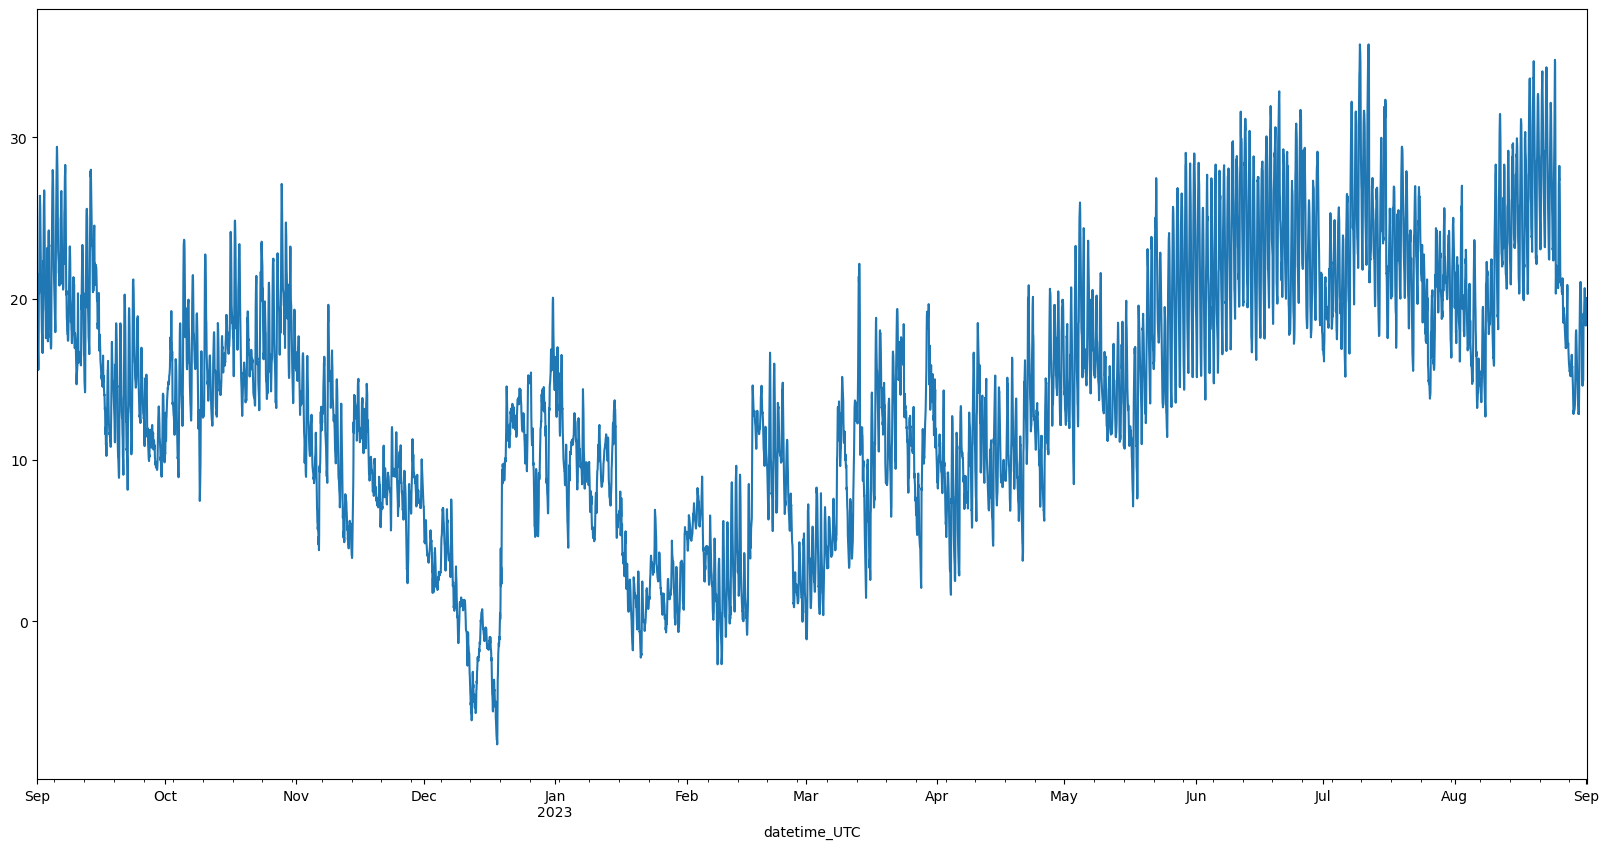

In [17]:
temp.loc['FRKART'].plot(figsize=(20, 10))

In [18]:
temp

datetime_UTC  2022-09-01 00:00:00+00:00  2022-09-01 01:00:00+00:00  \
station_id                                                           
FRASHA                            14.78                      14.53   
FRBETZ                            16.85                      15.73   
FRBRUH                            16.33                      15.90   
FRDIET                            13.98                      14.53   
FRDREI                            16.61                      16.21   
FREBNE                            13.42                      13.58   
FREICH                            13.79                      13.68   
FRFRIE                            15.22                      14.71   
FRGART                            15.91                      15.90   
FRGLBA                            14.13                      13.84   
FRGUNT                            14.11                      13.65   
FRHAID                            16.16                      15.38   
FRHBHF                            17.19                      16.68   
FRHERD                            16.05                      15.69   
FRHOCH                            14.64                      14.43   
FRHOLZ                            15.78                      15.92   
FRIHOC                            14.55                      14.22   
FRINST                            17.36                      17.06   
FRKART                            17.82                      17.87   
FRLAND                            14.92                      14.89   
FRLORE                            14.43                      14.01   
FRMERZ                            13.32                      12.89   
FRMESS                            16.19                      15.46   
FROPFS                            14.12                      14.07   
FROWIE                            15.48                      15.27   
FRPDAS                            16.86                      17.15   
FRRIES                            16.70                      16.08   
FRSEEP                            15.89                      14.74   
FRSTGA                            16.65                      16.44   
FRSTGE                            15.93                      15.59   
FRSTUH                            17.12                      17.27   
FRTIEN                            14.28                      13.94   
FRUNIK                            17.02                      16.12   
FRUWIE                            16.11                      16.05   
FRVAUB                            15.02                      14.73   
FRWAHS                            13.27                      12.78   
FRWEIN                            16.77                      15.88   
FRWILD                            14.69                      14.09   
FRWITT                            16.37                      15.89   
FRWSEE                            14.81                      14.70   
FRZAHR                            15.22                      14.72   

datetime_UTC  2022-09-01 02:00:00+00:00  2022-09-01 03:00:00+00:00  \
station_id                                                           
FRASHA                            14.20                      13.73   
FRBETZ                            15.15                      14.79   
FRBRUH                            15.40                      14.76   
FRDIET                            13.46                      13.22   
FRDREI                            16.06                      15.54   
FREBNE                            13.09                      13.12   
FREICH                            13.73                      13.35   
FRFRIE                            14.32                      13.86   
FRGART                            15.27                      15.14   
FRGLBA                            13.57                      13.43   
FRGUNT                            13.42                      13.20   
FRHAID                            14.48                      14.30   
FRHBHF   

<Axes: xlabel='datetime_UTC'>

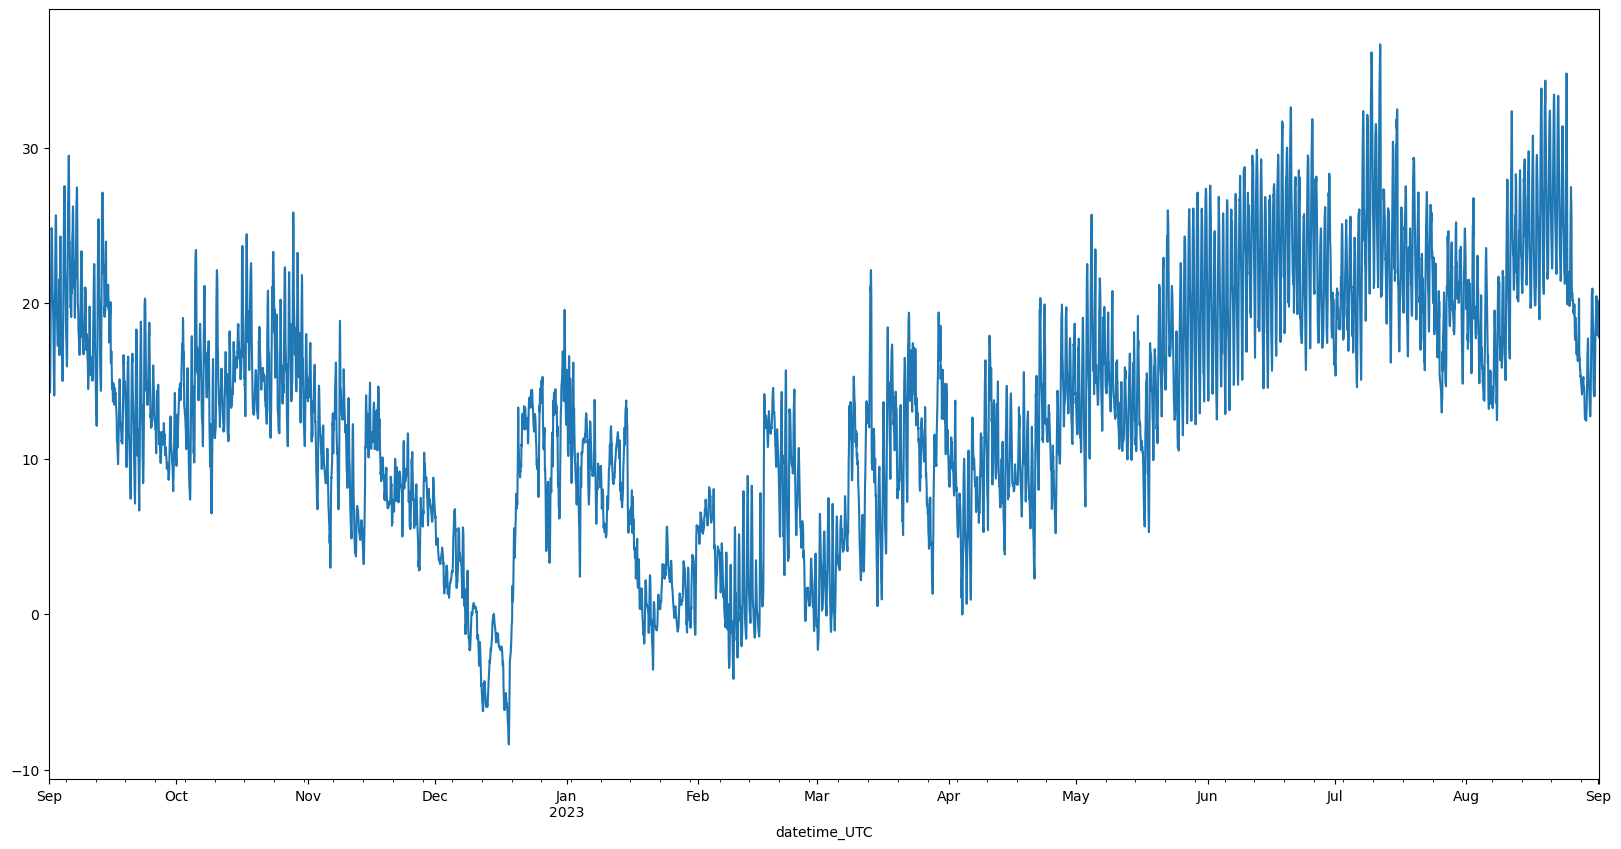

In [19]:
temp.loc['FRHERD'].plot(figsize=(20, 10))

In [ ]:
# for every day, find max and min air temp

temp_daily = temp.resample('D').agg(['max', 'min'])